In [1]:
import numpy as np
import joblib
import umap
import hdbscan
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
np.random.seed(42)

In [2]:
with open('/Users/alexanderhsu/Google Drive/My Drive/2023Data/asoid_manuscript/data2share/data_7bp.sav', 'rb') as f:
    data_train = joblib.load(f)
with open('/Users/alexanderhsu/Google Drive/My Drive/2023Data/asoid_manuscript/data2share/features.sav', 'rb') as f:
    features_train, scaled_features_train = joblib.load(f)
with open('/Users/alexanderhsu/Google Drive/My Drive/2023Data/asoid_manuscript/data2share/targets.sav', 'rb') as f:
    targets = joblib.load(f)

In [3]:
# HDBSCAN labeling function
def hdbscan_classification(umap_embeddings, cluster_range):
    max_num_clusters = -np.infty
    num_clusters = []
    min_cluster_size = np.linspace(cluster_range[0], cluster_range[1], 5)
    for min_c in min_cluster_size:
        learned_hierarchy = hdbscan.HDBSCAN(
            prediction_data=True, min_cluster_size=int(round(min_c * 0.01 * umap_embeddings.shape[0]))).fit(umap_embeddings)
        num_clusters.append(len(np.unique(learned_hierarchy.labels_)))
        if num_clusters[-1] > max_num_clusters:
            max_num_clusters = num_clusters[-1]
            retained_hierarchy = learned_hierarchy
    assignments = retained_hierarchy.labels_
    assign_prob = hdbscan.all_points_membership_vectors(retained_hierarchy)
    soft_assignments = np.argmax(assign_prob, axis=1)
    return retained_hierarchy, assignments, assign_prob, soft_assignments

In [4]:
## standardize features based on investigation only
#if you want to scale only within the class, set true
selected_class = 1
n_dim = 8 # 3 is standard
NOISE_COLOR = 'lightgray'
scale_just_invest = True
features_train_just_investigation = features_train[targets==selected_class, :]
if scale_just_invest:
    scaler = StandardScaler()
    scaler.fit(features_train_just_investigation)
    scaled_features_train_just_investigation = scaler.transform(features_train_just_investigation)
    reducer_embeddings = umap.UMAP(n_components=n_dim,
                                   min_dist=0.0,
                                   n_neighbors=60,
                                   random_state=42).fit_transform(scaled_features_train_just_investigation)
else:
    reducer_embeddings = umap.UMAP(n_components=n_dim,
                                   min_dist=0.0,
                                   n_neighbors=60,
                                   random_state=42).fit_transform(features_train[targets==selected_class, :])


In [14]:
cluster_range = [2, 3]
retained_hierarchy, assignments, assign_prob, soft_assignments = hdbscan_classification(reducer_embeddings, cluster_range)

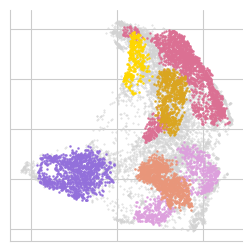

In [17]:
unique_classes = np.unique(assignments)
group_types = ['Noise']
group_types.extend(['Group{}'.format(i) for i in unique_classes if i >= 0])

markersize = 0.7
v_alpha = 0.9

extra_colors = {"Extra1": "darkred","Extra2": "indianred","Extra3": "orangered",
               "Extra4": "peru", "Extra5": "sandybrown", "Extra6": "goldenrod",
               "Extra7": "darkkhaki"}
extra_color_map = list(extra_colors.values())
uk = np.unique(assignments)
R = np.linspace(0, 1, len(uk))
cmap_extra = plt.cm.Spectral(R)
cmap_extra = ['mediumpurple', 'plum',  'palevioletred','gold', 'goldenrod','darksalmon']
fig, ax = plt.subplots(1, figsize=(3, 3))
for num, g in enumerate(unique_classes):
    if g >= 0:
        idx = np.where(assignments==g)[0]
        ax.scatter(reducer_embeddings[idx, 0], reducer_embeddings[idx, 1],
                   s=markersize,  alpha=v_alpha, color = cmap_extra[g])
    else:
        idx = np.where(assignments==g)[0]
        ax.scatter(reducer_embeddings[idx, 0], reducer_embeddings[idx, 1],
                   s=0.2,  alpha=v_alpha - 0.1 if v_alpha >= 0.2 else v_alpha, color = NOISE_COLOR)

ax.set_xticklabels('')
ax.set_yticklabels('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

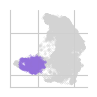

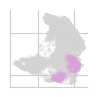

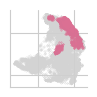

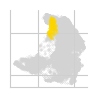

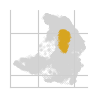

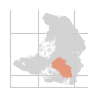

In [18]:
unique_classes = np.unique(assignments)
group_types = ['Noise']
group_types.extend(['Group{}'.format(i) for i in unique_classes if i >= 0])
markersize = 0.1
v_alpha = 0.9
extra_color_map = list(extra_colors.values())
uk = np.unique(assignments)
R = np.linspace(0, 1, len(uk))
for num, g in enumerate(unique_classes):
    if g >= 0:
        fig, ax = plt.subplots(1, figsize=(1, 1))
        idx = np.where(assignments!=g)[0]
        ax.scatter(reducer_embeddings[idx, 0], reducer_embeddings[idx, 1],
                   s=0.05,  alpha=v_alpha - 0.1 if v_alpha >= 0.2 else v_alpha, color = NOISE_COLOR)
        idx = np.where(assignments==g)[0]
        ax.scatter(reducer_embeddings[idx, 0], reducer_embeddings[idx, 1],
                   s=markersize,  alpha=v_alpha, color = cmap_extra[g])
        ax.set_xticklabels('')
        ax.set_yticklabels('')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.show()